In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readout import ReadoutExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from time import time
from tqdm import tqdm
from scipy.stats.stats import pearsonr

In [2]:
# Initilizes the experiment and utils
exp = ReadoutExperiment()
utils = Utils.instance()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.665

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:45379
INFO:DRV:      Host server up..............Done 0.06s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592581113.1516054
Include dir is : /home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592581113.1516054/initnetwork_0_0.c
gcc -Wall -I/home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjR

INFO:DRV:      Compiling Embedded snips....Done 0.46s
INFO:DRV:      Encoding axons/synapses.....Done 15.18s
INFO:DRV:      Encoding probes.............Done 3.93ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592581113.1516054/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592581113.1516054/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.78s
INFO:DRV:      Configuring registers.......Done 14.51s
INFO:DRV:      Transferring spikes.........Done 0.04s
INFO:DRV:      Transferring probes.........Done 0.02s
INFO:HST:  chip=0 cpu=0 Transfered values 20, 245, 30 
INFO:HST:  chip=1 cpu=0 Transfered values 

INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 3920 to 3950
INFO:HST:  chip=0 cpu=0 Reset functional state at 3950
INFO:HST:  chip=1 cpu=0 Reset functional state at 3950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4165 to 4195
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4165 to 4195
INFO:HST:  chip=0 cpu=0 Reset functional state at 4195
INFO:HST:  chip=1 cpu=0 Reset functional state at 4195
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4410 to 4440
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4410 to 4440
INFO:HST:  chip=0 cpu=0 Reset functional state at 4440
INFO:HST:  chip=1 cpu=0 Reset functional state at 4440
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4655 to 4685
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4655 to 4685
INFO:HST:  chip=0 cpu=0 Reset functional state at 4685
INFO:HST:  chip=1 cpu=0 Reset functional state at 4685
INFO:HST:  chip=1 cpu=0 Reset current/volt

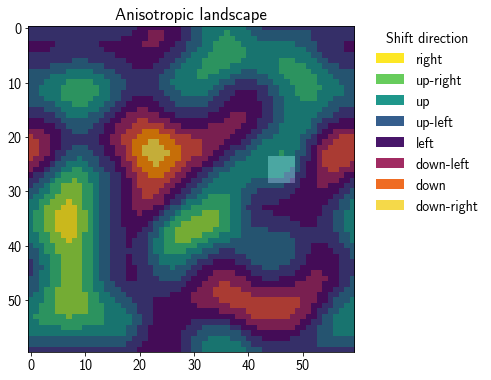

In [5]:
exp.net.plot.landscape()

In [6]:
exp.net.plot.plotDir

'/home/seq/05-reward/v0.x/datalog/2020-06-19_17-36-00/plots/'

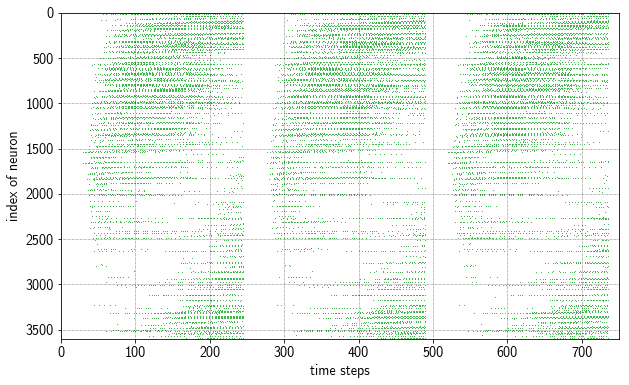

In [7]:
exp.net.plot.reservoirSpikeTrain(fr=0, to=750, colorEx=exp.p.pltColor3, figsize=(10,6))

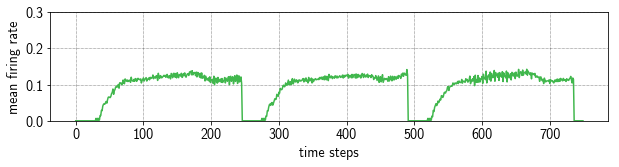

In [8]:
exp.net.plot.reservoirRates(fr=0, to=750, ylim=(0.0,0.3), colorEx=exp.p.pltColor3, figsize=(10,2))

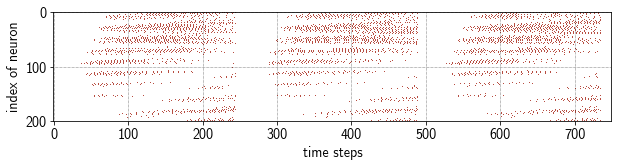

In [9]:
exp.net.plot.outputSpikeTrain(fr=0, to=750, figsize=(10,2))

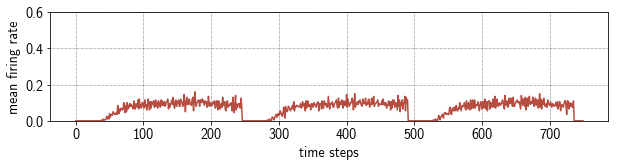

In [10]:
exp.net.plot.outputRates(fr=0, to=750, ylim=(0,0.6), figsize=(10,2))

In [11]:
filePath = 'data/robot2/hide_rec_dmp.txt'
targets = np.loadtxt(filePath)

files = [
    'hide_rec_dmp.txt',
    'move_up_rec_dmp.txt',
    'put_on_top_rec_dmp.txt',
    'unhide_rec_dmp.txt',
    'move_down_rec.txt',
    'pick_and_place_rec_dmp.txt',
    'take_down_rec_dmp.txt'
]

targets = np.array([ np.loadtxt('data/robot2/'+file)[-200:,0:3] for file in files ])
targets = np.moveaxis(targets, 1, 2)

In [12]:
targets.shape

(7, 3, 200)

In [13]:
#tt = 0

#fig = plt.figure(figsize=(8, 8))
#ax = plt.axes(projection='3d')
#ax.plot3D(targets[tt,:,0], targets[tt,:,1], targets[tt,:,2], linewidth=3.0)

In [11]:
data = exp.net.exSpikeData
#data = exp.net.outSpikeData

np.save('data/comparison/spikes_ex-anisotropic.npy', exp.net.exSpikeData)
np.save('data/comparison/spikes_out-anisotropic.npy', exp.net.outSpikeData)

data.shape

(25, 3600, 210)

In [15]:
def calcTrialDiffs(data):
    diffs = []
    for i in range(exp.p.trials):
        for j in range(exp.p.trials):
            if i > j:
                # Get difference between data, devide by number of neurons
                diff = np.abs(data[i] - data[j])/data.shape[1]
                # Mean over neurons
                diff_mean = np.sum(diff, axis=0)
                # Append to list
                diffs.append(diff_mean)
    
    # Make numpy array and return
    return np.array(diffs)

In [16]:
diffs = calcTrialDiffs(data)

In [17]:
def trialDiffMean(diffs):
    # Calculate mean and standard deviation
    m = np.mean(np.array(diffs), axis=0)
    s = np.std(np.array(diffs), axis=0)
    
    # Plot mean
    plt.plot(m, color=exp.p.pltColor3, linewidth=2.0)
    # Plot standard deviation around mean
    plt.fill_between(np.arange(210), m-s, m+s, color=exp.p.pltColor3, alpha=0.5)

    # Set y limits
    plt.ylim(0,0.5)
    # Save and show plot
    plt.savefig(exp.net.plot.plotDir + 'trial-diff.' + exp.p.pltFileType)
    p = plt.show()

In [18]:
#np.save('anisotropic-diffs.npy', diffs)

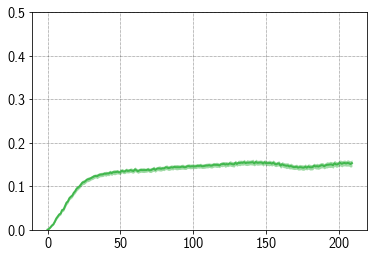

In [19]:
trialDiffMean(diffs)

maxDiff = exp.p.reservoirExSize / exp.p.refractoryDelay
#maxDiff = exp.p.numOutputNeurons
difb01 = np.abs(bins[:,0,:] - bins[:,1,:])/maxDiff
print(difb01.shape)
p = plt.plot(np.sum(difb01, axis=1))
plt.ylim(0,0.5)

In [20]:
def binData(data, binSize = 10):
    return np.array([np.mean(data[:, :, i:i+binSize], axis=2) for i in range(0,data.shape[2],binSize)])

In [21]:
binSize = 10

bins = binData(data, binSize)
bins.shape

(21, 25, 3600)

In [22]:
def pcaAllTrials(binnedData):
    pcaAll = []
    for i in range(exp.p.trials):
        # Calculate pca from bins
        (d, evals, evecs) = utils.pca(binnedData[:,i,:].astype(float), dims_rescaled_data=2)
        pcaAll.append(d)
    # Make numpy array and return
    return np.array(pcaAll)

In [23]:
dtrans = pcaAllTrials(bins)
dtrans.shape

(25, 21, 2)

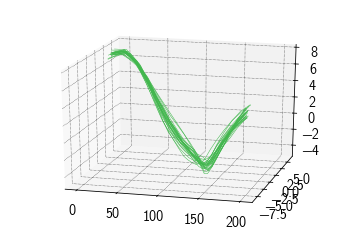

In [24]:
ax = plt.axes(projection='3d')
for i in range(exp.p.trials):
    ax.plot3D(np.arange(0,exp.p.stepsPerTrial,binSize), dtrans[i,:,0], dtrans[i,:,1], linewidth=0.5, color=exp.p.pltColor3)
ax.view_init(20,285)
plt.savefig(exp.net.plot.plotDir + 'pca3d.' + exp.p.pltFileType)
p = plt.show()

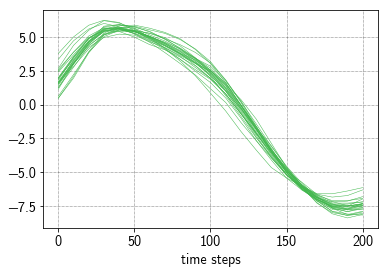

In [25]:
for i in range(exp.p.trials):
    plt.plot(np.arange(0,exp.p.stepsPerTrial,binSize), dtrans[i,:,0], linewidth=0.5, color=exp.p.pltColor3)
plt.xlabel('time steps')
plt.savefig(exp.net.plot.plotDir + 'pca1d.' + exp.p.pltFileType)
p = plt.show()

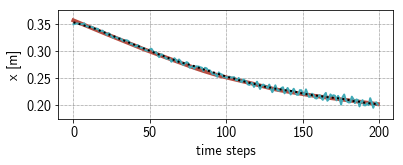

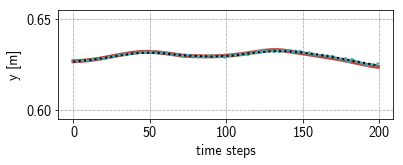

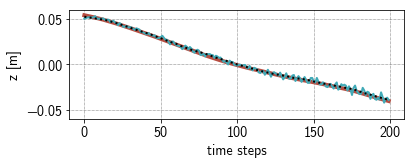

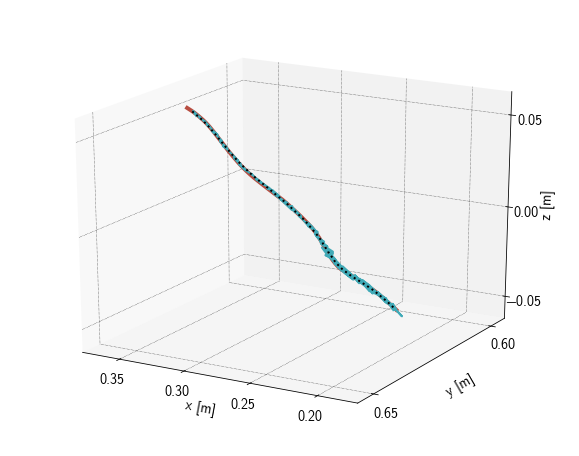

In [26]:
"""
Generalisation Pool
"""

# Prepare data
(x, xe, y) = utils.prepareDataset(exp.net.outSpikeData, exp.target)

# Estimate and plot x-dim
x1 = utils.estimateMovement(x, xe, y[0])
exp.net.plot.movement1D(x1, exp.target[0], dim='x', ylim=(0.175,0.375), figsize=(6,2))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(x2, exp.target[1], dim='y', ylim=(0.595,0.655), figsize=(6,2))

# Estimate and plot z-dim
x3 = utils.estimateMovement(x, xe, y[2])
exp.net.plot.movement1D(x3, exp.target[2], dim='z', ylim=(-0.06,0.06), figsize=(6,2))

# Plot 3D
exp.net.plot.movement3D(
    [x1, x2, x3], exp.target, figsize=(10,8),
    xlim=(0.175,0.375), ylim=(0.595,0.655), zlim=(-0.06,0.06)
)

In [27]:
exp.net.plot.plotDir

'/home/seq/05-reward/v0.x/datalog/2020-06-15_16-56-14/plots/'

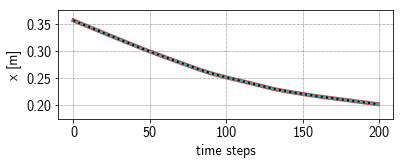

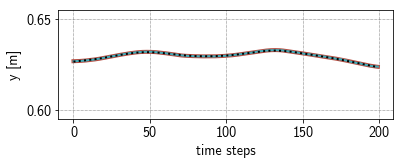

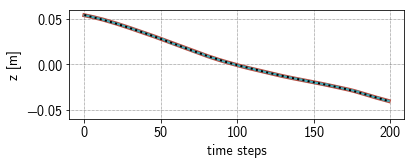

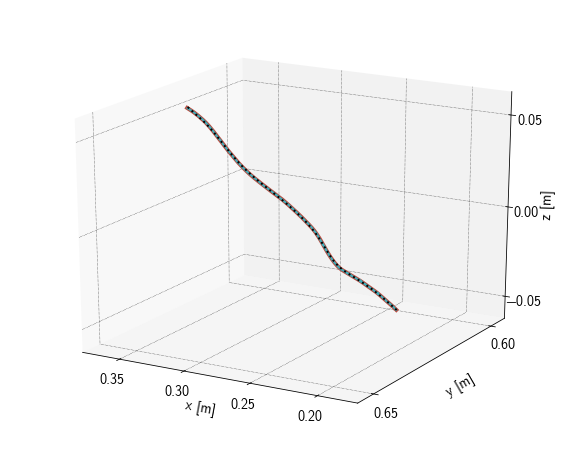

In [28]:
"""
Representation Reservoir
"""
# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.exSpikeData, exp.target, trainTrials=np.repeat(True, exp.p.trials), testTrial=1)

# Estimate and plot x-dim
x1 = utils.estimateMovement(x, xe, y[0])
exp.net.plot.movement1D(x1, exp.target[0], dim='x', ylim=(0.175,0.375), figsize=(6,2))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(x2, exp.target[1], dim='y', ylim=(0.595,0.655), figsize=(6,2))

# Estimate and plot z-dim
x3 = utils.estimateMovement(x, xe, y[2])
exp.net.plot.movement1D(x3, exp.target[2], dim='z', ylim=(-0.06,0.06), figsize=(6,2))

# Plot 3D
exp.net.plot.movement3D(
    [x1, x2, x3], exp.target, figsize=(10,8),
    xlim=(0.175,0.375), ylim=(0.595,0.655), zlim=(-0.06,0.06)
)

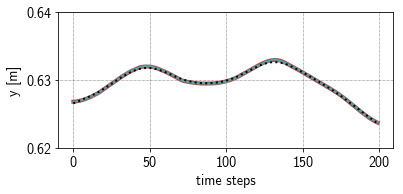

In [29]:
"""
Representation Reservoir
"""
# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.exSpikeData, exp.target, trainTrials=np.repeat(True, exp.p.trials))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='anisotropic_representation_reservoir'
)

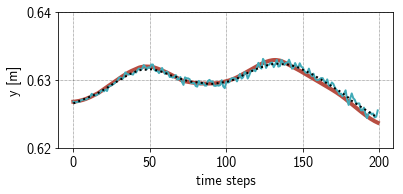

In [30]:
"""
Representation Pool
"""
# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.outSpikeData, exp.target, trainTrials=np.repeat(True, exp.p.trials))

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='anisotropic_representation_pool'
)

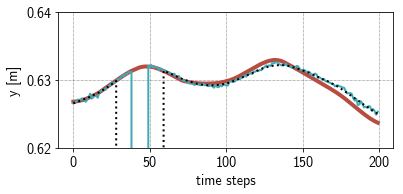

In [31]:
"""
Generalisation Reservoir
"""
testTrial = 20

trainTrials=np.repeat(True, exp.p.trials)
trainTrials[testTrial] = False

# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.exSpikeData, exp.target)#, trainTrials=trainTrials, testTrial=testTrial)

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='anisotropic_generalisation_reservoir'
)

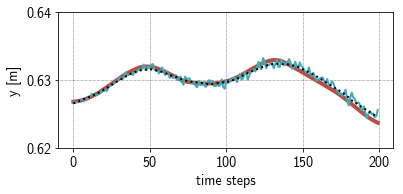

In [32]:
"""
Generalisation Pool
"""

testTrial = 20

trainTrials=np.repeat(True, exp.p.trials)
trainTrials[testTrial] = False

# Prepare data
(x, xe, y) = utils.prepareDataset(
    exp.net.outSpikeData, exp.target)

# Estimate and plot y-dim
x2 = utils.estimateMovement(x, xe, y[1])
exp.net.plot.movement1D(
    x2, exp.target[1], dim='y', ylim=(0.62,0.64), figsize=(6,2.5),
    precision=100, suffix='anisotropic_generalisation_pool'
)

In [48]:
"""
Mutiple targets
"""

# Representation Reservoir
estimatesRepRes = utils.estimateMultipleTrajectories3D(exp.net.exSpikeData, targets, trainTrials=np.repeat(True, exp.p.trials))
# Representation Pool
estimatesRepPoo = utils.estimateMultipleTrajectories3D(exp.net.outSpikeData, targets, trainTrials=np.repeat(True, exp.p.trials))
# Generalisation Reservoir
estimatesGenRes = utils.estimateMultipleTrajectories3D(exp.net.exSpikeData, targets)
# Generalisation Pool
estimatesGenPoo = utils.estimateMultipleTrajectories3D(exp.net.outSpikeData, targets)


100%|██████████| 7/7 [10:19<00:00, 88.53s/it]

100%|██████████| 7/7 [00:01<00:00,  4.41it/s]

100%|██████████| 7/7 [09:50<00:00, 84.29s/it]

100%|██████████| 7/7 [00:01<00:00,  4.56it/s]


In [49]:
def calcMSE(estimates):
    mse = []
    for i in range(targets.shape[0]):
        mse.append(np.mean([np.mean(np.square(estimates[i,j] - targets[i,j])) for j in range(3)]))
    return mse

In [57]:
mse = np.array([
    calcMSE(estimatesRepRes),
    calcMSE(estimatesRepPoo),
    calcMSE(estimatesGenRes),
    calcMSE(estimatesGenPoo)
])

In [59]:
mseMeans = np.mean(mse, axis=1)

In [60]:
mseMeans

array([3.60796311e-07, 3.29593166e-05, 8.25975911e+16, 3.97844801e-05])

In [61]:
np.save('data/trajectories_anisotropic.npy', mse)